In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

In [144]:
train=pd.read_csv("train.csv", parse_dates=["delivery date","placement date"])
test=pd.read_csv("test.csv", parse_dates=["delivery date","placement date"])
train.shape, test.shape

((6700, 16), (3294, 15))

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               6700 non-null   int64         
 1   departure city   6700 non-null   object        
 2   discount         6700 non-null   float64       
 3   price            6700 non-null   float64       
 4   no of items      6700 non-null   int64         
 5   location         6700 non-null   object        
 6   class            6700 non-null   object        
 7   segment          6700 non-null   object        
 8   sub-class        6700 non-null   object        
 9   delivery type    6699 non-null   object        
 10  RID              6700 non-null   int64         
 11  profit           6700 non-null   float64       
 12  delivery date    6700 non-null   datetime64[ns]
 13  address code     6700 non-null   int64         
 14  departure state  6700 non-null   object 

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               3294 non-null   int64         
 1   departure city   3294 non-null   object        
 2   discount         3294 non-null   float64       
 3   price            3294 non-null   float64       
 4   no of items      3294 non-null   int64         
 5   location         3294 non-null   object        
 6   class            3294 non-null   object        
 7   segment          3294 non-null   object        
 8   sub-class        3294 non-null   object        
 9   delivery type    3294 non-null   object        
 10  RID              3294 non-null   int64         
 11  delivery date    3294 non-null   datetime64[ns]
 12  address code     3294 non-null   int64         
 13  departure state  3294 non-null   object        
 14  placement date   3294 non-null   datetim

In [147]:
train.describe()

id     discount         price  no of items          RID  \
count  6700.000000  6700.000000   6700.000000  6700.000000  6700.000000   
mean   3350.500000     0.155876    234.424275     3.798507  4954.381791   
std    1934.267734     0.205922    641.440815     2.225327  2921.304952   
min       1.000000     0.000000      0.836000     1.000000     1.000000   
25%    1675.750000     0.000000     17.340000     2.000000  2389.750000   
50%    3350.500000     0.200000     54.960000     3.000000  4941.500000   
75%    5025.250000     0.200000    212.940000     5.000000  7507.250000   
max    6700.000000     0.800000  22638.480000    14.000000  9990.000000   

            profit  address code  
count  6700.000000   6700.000000  
mean     29.121046  54719.073284  
std     230.712951  32092.421012  
min   -6599.978000   1040.000000  
25%       1.713750  22204.000000  
50%       8.803200  55113.000000  
75%      30.023400  90004.000000  
max    8399.976000  99301.000000

In [148]:
test.describe()

id     discount         price  no of items          RID  \
count  3294.00000  3294.000000   3294.000000  3294.000000  3294.000000   
mean   8347.50000     0.156867    220.570193     3.771403  5085.202489   
std     951.04022     0.207555    584.474393     2.224895  2808.613919   
min    6701.00000     0.000000      0.444000     1.000000    13.000000   
25%    7524.25000     0.000000     17.040000     2.000000  2658.750000   
50%    8347.50000     0.200000     53.337000     3.000000  5179.000000   
75%    9170.75000     0.200000    204.495550     5.000000  7493.750000   
max    9994.00000     0.800000  13999.960000    14.000000  9994.000000   

       address code  
count   3294.000000  
mean   56149.016697  
std    31988.623987  
min     1841.000000  
25%    27834.000000  
50%    60472.500000  
75%    90032.000000  
max    99301.000000

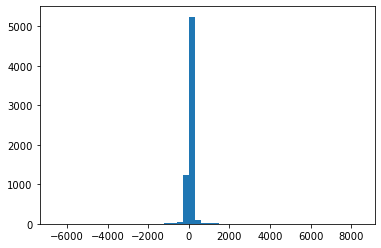

In [149]:
plt.hist(train["profit"], bins=50);

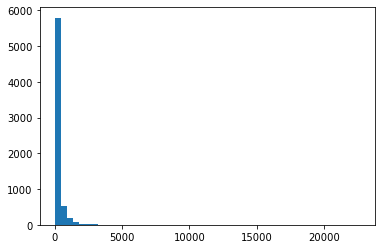

In [150]:
plt.hist(train["price"], bins=50);

In [151]:
train["price"]=np.log(train["price"]+1)
test["price"]=np.log(test["price"]+1)

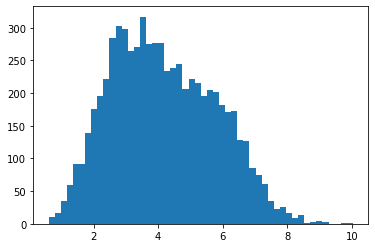

In [152]:
plt.hist(train["price"], bins=50);

<AxesSubplot:xlabel='sub-class', ylabel='profit'>

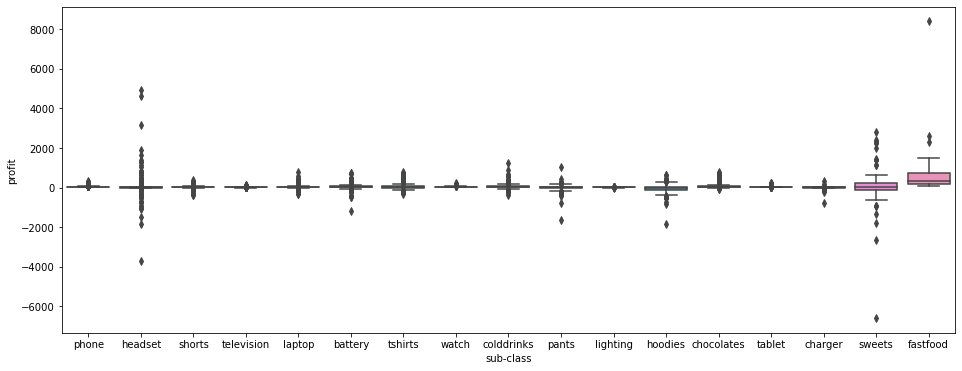

In [153]:
plt.figure(figsize=(16,6))
sns.boxplot(y=train["profit"], x=train["sub-class"])

<AxesSubplot:xlabel='sub-class', ylabel='price'>

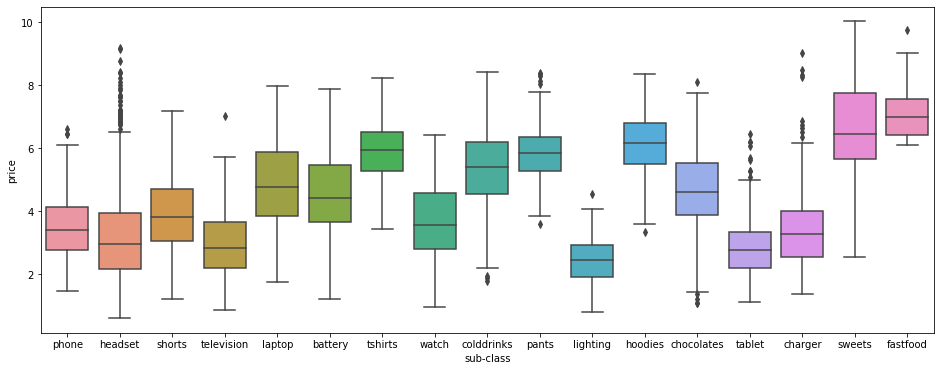

In [154]:
plt.figure(figsize=(16,6))
sns.boxplot(y=train["price"], x=train["sub-class"])

In [155]:
train[(train["sub-class"]=="sweets") | (train["sub-class"]=="fastfood")].sort_values("profit", ascending=False)

id departure city  discount      price  no of items location   class  \
5895  5896      Lafayette       0.0   9.770010            5  Central  fynota   
4239  4240      Arlington       0.0   9.076918            5    South  fynota   
5860  5861     Providence       0.0   8.594323            9     East  fynota   
4372  4373        Yonkers       0.0   8.497180            7     East  fynota   
4458  4459       Lakewood       0.0   9.116132            7     East  fynota   
...    ...            ...       ...        ...          ...      ...     ...   
2028  2029         Medina       0.7   7.080868            9     East  fynota   
1117  1118    San Antonio       0.4   9.007116            8  Central  fynota   
150    151   Jacksonville       0.5  10.027451            6    South  fynota   
3820  3821         Newark       0.7   7.496094            2     East  fynota   
6092  6093      Lancaster       0.7   8.412052            5     East  fynota   

          segment sub-class   delivery type   RID     profit delivery date  \
5895    Corporate  fastfood  Standard Class  6827  8399.9760    2020-10-01   
4239     Consumer    sweets    Second Class  8489  2799.9840    2020-02-01   
5860  Home Office  fastfood  Standard Class  7667  2591.9568    2020-10-01   
4372     Consumer    sweets  Standard Class  1086  2400.9657    2020-03-01   
4458    Corporate    sweets  Standard Class  4278  2365.9818    2020-04-01   
...           ...       ...             ...   ...        ...           ...   
2028    Corporate    sweets  Standard Class   216  -950.4000    2019-01-01   
1117     Consumer    sweets  Standard Class   166 -1359.9920    2018-09-01   
150   Home Office    sweets  Standard Class  2698 -1811.0784    2018-03-01   
3820     Consumer    sweets     First Class  3152 -2639.9912    2019-12-01   
6092     Consumer    sweets  Standard Class  7773 -6599.9780    2020-12-01   

      address code departure state placement date  
5895         47905         Indiana     2020-10-01  
4239         22204        Virginia     2020-02-01  
5860          2908    Rhode Island     2020-10-01  
4372         10701        New York     2020-03-01  
4458          8701      New Jersey     2020-04-01  
...            ...             ...            ...  
2028         44256            Ohio     2019-01-01  
1117         78207           Texas     2018-09-01  
150          32216         Florida     2018-03-01  
3820         43055            Ohio     2019-12-01  
6092         43130            Ohio     2020-11-01  

[130 rows x 16 columns]

In [156]:
train[(train["sub-class"]=="sweets") | (train["sub-class"]=="fastfood")].sort_values("price", ascending=False).head(10)

id departure city  discount      price  no of items location   class  \
150    151   Jacksonville       0.5  10.027451            6    South  fynota   
5895  5896      Lafayette       0.0   9.770010            5  Central  fynota   
4458  4459       Lakewood       0.0   9.116132            7     East  fynota   
4239  4240      Arlington       0.0   9.076918            5    South  fynota   
4601  4602   Philadelphia       0.4   9.036103            4     East  fynota   
1117  1118    San Antonio       0.4   9.007116            8  Central  fynota   
1935  1936  New York City       0.0   8.853803            4     East  fynota   
5860  5861     Providence       0.0   8.594323            9     East  fynota   
4372  4373        Yonkers       0.0   8.497180            7     East  fynota   
3899  3900    Springfield       0.0   8.497180            7  Central  fynota   

          segment sub-class   delivery type   RID     profit delivery date  \
150   Home Office    sweets  Standard Class  2698 -1811.0784    2018-03-01   
5895    Corporate  fastfood  Standard Class  6827  8399.9760    2020-10-01   
4458    Corporate    sweets  Standard Class  4278  2365.9818    2020-04-01   
4239     Consumer    sweets    Second Class  8489  2799.9840    2020-02-01   
4601     Consumer  fastfood  Standard Class  6426  1119.9968    2020-05-01   
1117     Consumer    sweets  Standard Class   166 -1359.9920    2018-09-01   
1935     Consumer    sweets  Standard Class  6627  2239.9872    2018-12-01   
5860  Home Office  fastfood  Standard Class  7667  2591.9568    2020-10-01   
4372     Consumer    sweets  Standard Class  1086  2400.9657    2020-03-01   
3899    Corporate  fastfood  Standard Class  8991  2302.9671    2019-12-01   

      address code departure state placement date  
150          32216         Florida     2018-03-01  
5895         47905         Indiana     2020-10-01  
4458          8701      New Jersey     2020-04-01  
4239         22204        Virginia     2020-02-01  
4601         19120    Pennsylvania     2020-05-01  
1117         78207           Texas     2018-09-01  
1935         10024        New York     2018-12-01  
5860          2908    Rhode Island     2020-10-01  
4372         10701        New York     2020-03-01  
3899         65807        Missouri     2019-12-01

In [157]:
train[(train["sub-class"]=="sweets") | (train["sub-class"]=="fastfood")].sort_values("profit", ascending=True).head(10)

id departure city  discount      price  no of items location   class  \
6092  6093      Lancaster       0.7   8.412052            5     East  fynota   
3820  3821         Newark       0.7   7.496094            2     East  fynota   
150    151   Jacksonville       0.5  10.027451            6    South  fynota   
1117  1118    San Antonio       0.4   9.007116            8  Central  fynota   
2028  2029         Medina       0.7   7.080868            9     East  fynota   
1025  1026      Charlotte       0.5   7.873211            3    South  fynota   
5866  5867         Pueblo       0.7   6.557786            6     West  fynota   
4295  4296   Philadelphia       0.7   6.109470            3     East  fynota   
1220  1221     Greenville       0.5   7.170881            2    South  fynota   
1162  1163   Philadelphia       0.7   5.992814            4     East  fynota   

          segment sub-class   delivery type   RID     profit delivery date  \
6092     Consumer    sweets  Standard Class  7773 -6599.9780    2020-12-01   
3820     Consumer    sweets     First Class  3152 -2639.9912    2019-12-01   
150   Home Office    sweets  Standard Class  2698 -1811.0784    2018-03-01   
1117     Consumer    sweets  Standard Class   166 -1359.9920    2018-09-01   
2028    Corporate    sweets  Standard Class   216  -950.4000    2019-01-01   
1025     Consumer    sweets  Standard Class  4129  -944.9946    2018-09-01   
5866  Home Office    sweets     First Class  7642  -938.2800    2020-10-01   
4295    Corporate    sweets    Second Class  7423  -643.7100    2020-03-01   
1220     Consumer    sweets  Standard Class  7647  -571.9956    2018-09-01   
1162    Corporate    sweets  Standard Class  1682  -559.3560    2018-09-01   

      address code departure state placement date  
6092         43130            Ohio     2020-11-01  
3820         43055            Ohio     2019-12-01  
150          32216         Florida     2018-03-01  
1117         78207           Texas     2018-09-01  
2028         44256            Ohio     2019-01-01  
1025         28205  North Carolina     2018-09-01  
5866         81001        Colorado     2020-10-01  
4295         19134    Pennsylvania     2020-03-01  
1220         27834  North Carolina     2018-09-01  
1162         19134    Pennsylvania     2018-09-01

<AxesSubplot:xlabel='sub-class', ylabel='price'>

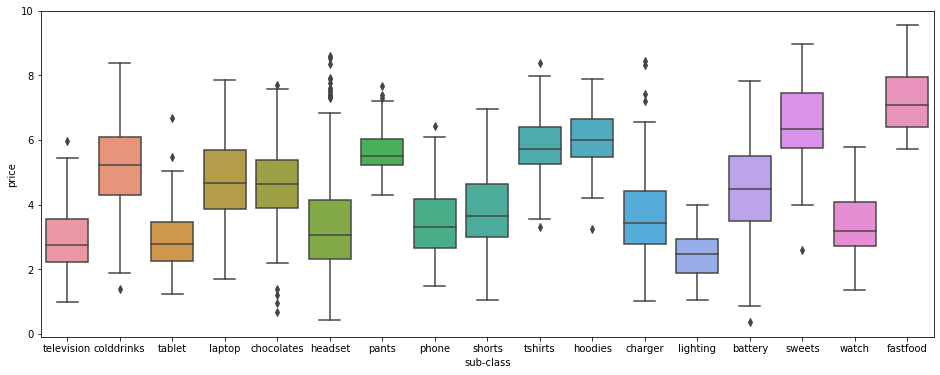

In [159]:
plt.figure(figsize=(16,6))
sns.boxplot(y=test["price"], x=test["sub-class"])

In [160]:
test.sort_values("price", ascending=False)

id departure city  discount     price  no of items location   class  \
257   6958        Seattle       0.0  9.546881            4     West  fynota   
2105  8806  New York City       0.2  9.323755            4     East  fynota   
2433  9134         Newark       0.0  9.259223            3     East  fynota   
2690  9391     Burlington       0.5  8.987319            4    South  fynota   
108   6809        Jackson       0.0  8.602446            4  Central  kariox   
...    ...            ...       ...       ...          ...      ...     ...   
559   7260   Philadelphia       0.7  0.782988            2     East  kariox   
1378  8079       Portland       0.7  0.732368            2     West  kariox   
2361  9062  San Francisco       0.0  0.688135            1     West  fynota   
404   7105           Waco       0.8  0.442118            1  Central  kariox   
984   7685        Houston       0.8  0.367417            1  Central  kariox   

          segment   sub-class   delivery type   RID delivery date  \
257      Consumer    fastfood     First Class  8154    2021-03-01   
2105  Home Office    fastfood     First Class  2624    2021-10-01   
2433     Consumer    fastfood  Standard Class  4191    2021-11-01   
2690    Corporate      sweets        Same Day   684    2021-11-01   
108      Consumer     headset    Second Class  6521    2021-01-01   
...           ...         ...             ...   ...           ...   
559     Corporate     headset     First Class  1686    2021-04-01   
1378     Consumer     headset  Standard Class   977    2021-07-01   
2361  Home Office  chocolates     First Class  2762    2021-10-01   
404     Corporate     headset        Same Day  9293    2021-03-01   
984      Consumer     battery  Standard Class  4102    2021-06-01   

      address code departure state placement date  
257          98115      Washington     2021-03-01  
2105         10024        New York     2021-10-01  
2433         19711        Delaware     2021-11-01  
2690         27217  North Carolina     2021-11-01  
108          49201        Michigan     2021-01-01  
...            ...             ...            ...  
559          19143    Pennsylvania     2021-04-01  
1378         97206          Oregon     2021-07-01  
2361         94110      California     2021-10-01  
404          76706           Texas     2021-03-01  
984          77095           Texas     2021-06-01  

[3294 rows x 15 columns]

<AxesSubplot:xlabel='location', ylabel='price'>

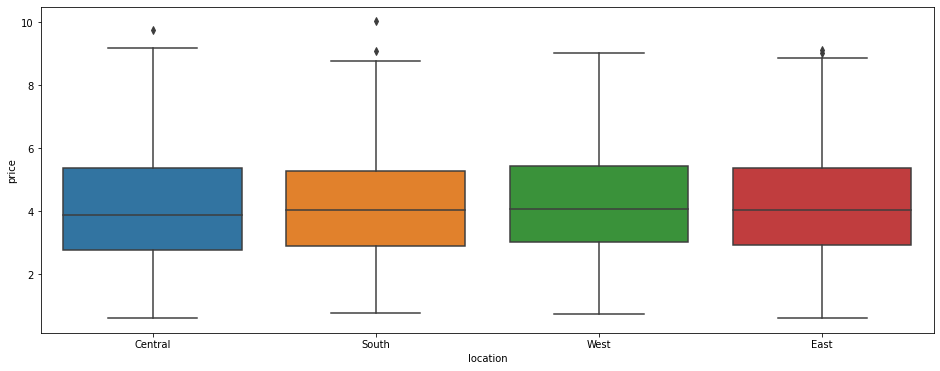

In [161]:
plt.figure(figsize=(16,6))
sns.boxplot(y=train["price"], x=train["location"])

<AxesSubplot:xlabel='location', ylabel='profit'>

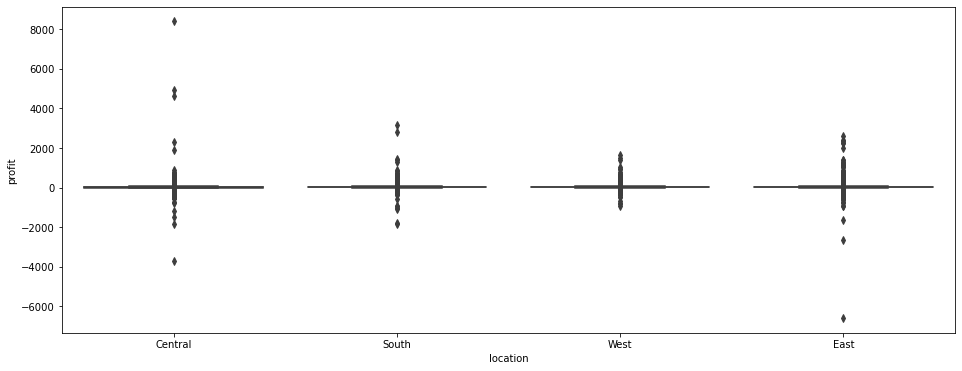

In [162]:
plt.figure(figsize=(16,6))
sns.boxplot(y=train["profit"], x=train["location"])

In [163]:
id=test["id"]

In [164]:
data=pd.concat((train, test), axis=0)
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 3293
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               9993 non-null   int64         
 1   departure city   9993 non-null   object        
 2   discount         9993 non-null   float64       
 3   price            9993 non-null   float64       
 4   no of items      9993 non-null   int64         
 5   location         9993 non-null   object        
 6   class            9993 non-null   object        
 7   segment          9993 non-null   object        
 8   sub-class        9993 non-null   object        
 9   delivery type    9992 non-null   object        
 10  RID              9993 non-null   int64         
 11  profit           6699 non-null   float64       
 12  delivery date    9993 non-null   datetime64[ns]
 13  address code     9993 non-null   int64         
 14  departure state  9993 non-null   object 

((9993, 16), None)

In [165]:
data.nunique()

id                 9993
departure city      531
discount             12
price              5824
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
RID                9993
profit             5284
delivery date        49
address code        631
departure state      49
placement date       48
dtype: int64

In [166]:
df=data["departure city"].value_counts().reset_index()

In [167]:
df.columns=["departure city","city_count"]
df.head()

departure city  city_count
0  New York City         915
1    Los Angeles         747
2   Philadelphia         537
3  San Francisco         510
4        Seattle         428

In [168]:
data=data.merge(df, on="departure city", how="left")
data.drop("departure city", axis=1, inplace=True)
data.head()

id  discount     price  no of items location   class   segment   sub-class  \
0   1       0.2  2.859225            2  Central  kariox  Consumer       phone   
1   2       0.0  3.424263            5  Central  kariox  Consumer     headset   
2   3       0.0  2.755570            3  Central   qexty  Consumer      shorts   
3   4       0.0  3.804883            3  Central  kariox  Consumer  television   
4   5       0.0  4.213312            2  Central  kariox  Consumer      laptop   

    delivery type   RID   profit delivery date  address code departure state  \
0  Standard Class  7981   5.5512    2018-01-01         77095           Texas   
1  Standard Class  6334  13.3650    2018-01-01         48185        Michigan   
2  Standard Class  6333   4.8609    2018-01-01         48185        Michigan   
3  Standard Class  6332  12.7368    2018-01-01         48185        Michigan   
4  Standard Class  6331  15.9792    2018-01-01         48185        Michigan   

  placement date  city_count  
0     2018-01-01         377  
1     2018-01-01          13  
2     2018-01-01          13  
3     2018-01-01          13  
4     2018-01-01          13

In [169]:
data["location"].value_counts()

West       3203
East       2848
Central    2322
South      1620
Name: location, dtype: int64

<AxesSubplot:xlabel='location'>

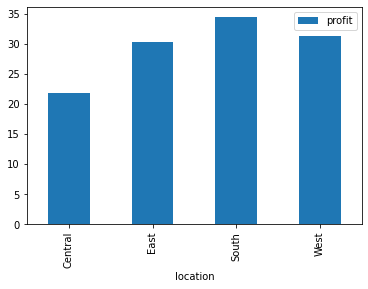

In [170]:
pd.pivot_table(data=train, index="location", values="profit").plot(kind="bar")

In [171]:
data["class"].value_counts()

kariox    6026
qexty     2121
fynota    1846
Name: class, dtype: int64

<AxesSubplot:xlabel='class'>

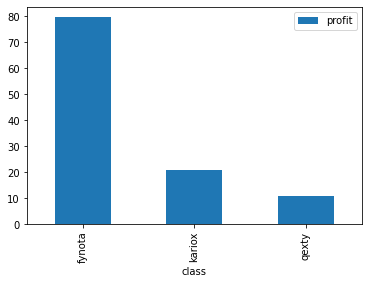

In [172]:
pd.pivot_table(data=train, index="class", values="profit").plot(kind="bar")

In [173]:
data["segment"].value_counts()

Consumer       5190
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

<AxesSubplot:xlabel='segment'>

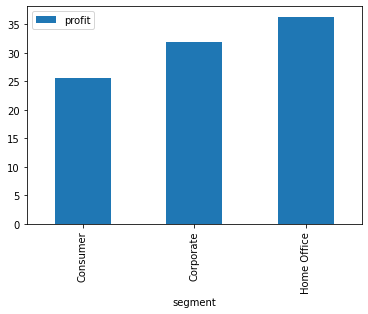

In [174]:
pd.pivot_table(data=train, index="segment", values="profit").plot(kind="bar")

In [175]:
data["sub-class"].value_counts()

headset       1523
phone         1370
shorts         957
colddrinks     889
laptop         846
television     796
chocolates     775
tshirts        617
battery        466
tablet         364
hoodies        319
watch          254
pants          228
lighting       217
charger        190
sweets         114
fastfood        68
Name: sub-class, dtype: int64

<AxesSubplot:xlabel='sub-class'>

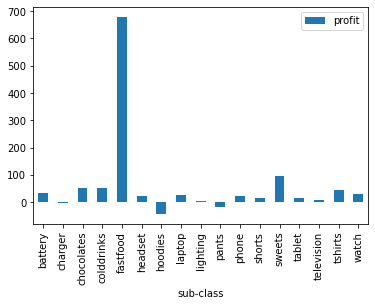

In [176]:
pd.pivot_table(data=train, index="sub-class", values="profit").plot(kind="bar")

In [177]:
data["delivery type"].value_counts()

Standard Class    5967
Second Class      1944
First Class       1538
Same Day           543
Name: delivery type, dtype: int64

<AxesSubplot:xlabel='delivery type'>

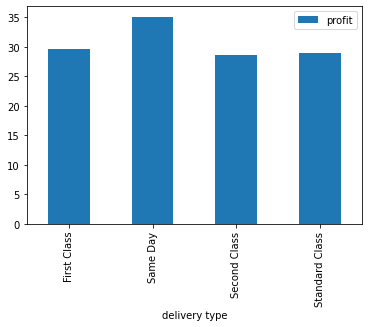

In [178]:
pd.pivot_table(data=train, index="delivery type", values="profit").plot(kind="bar")

In [179]:
data["diff"]=(data["delivery date"]-data["placement date"]).dt.days
data.drop(["delivery date","placement date"], axis=1, inplace=True)
data.head()

id  discount     price  no of items location   class   segment   sub-class  \
0   1       0.2  2.859225            2  Central  kariox  Consumer       phone   
1   2       0.0  3.424263            5  Central  kariox  Consumer     headset   
2   3       0.0  2.755570            3  Central   qexty  Consumer      shorts   
3   4       0.0  3.804883            3  Central  kariox  Consumer  television   
4   5       0.0  4.213312            2  Central  kariox  Consumer      laptop   

    delivery type   RID   profit  address code departure state  city_count  \
0  Standard Class  7981   5.5512         77095           Texas         377   
1  Standard Class  6334  13.3650         48185        Michigan          13   
2  Standard Class  6333   4.8609         48185        Michigan          13   
3  Standard Class  6332  12.7368         48185        Michigan          13   
4  Standard Class  6331  15.9792         48185        Michigan          13   

   diff  
0     0  
1     0  
2     0  
3     0  
4     0

In [180]:
df=data["departure state"].value_counts().reset_index()
df.columns=["departure state","state_count"]
df.head()

departure state  state_count
0      California         2001
1        New York         1128
2           Texas          984
3    Pennsylvania          587
4      Washington          506

In [181]:
data=data.merge(df, on="departure state", how="left")
data.drop("departure state", axis=1, inplace=True)
data.head()

id  discount     price  no of items location   class   segment   sub-class  \
0   1       0.2  2.859225            2  Central  kariox  Consumer       phone   
1   2       0.0  3.424263            5  Central  kariox  Consumer     headset   
2   3       0.0  2.755570            3  Central   qexty  Consumer      shorts   
3   4       0.0  3.804883            3  Central  kariox  Consumer  television   
4   5       0.0  4.213312            2  Central  kariox  Consumer      laptop   

    delivery type   RID   profit  address code  city_count  diff  state_count  
0  Standard Class  7981   5.5512         77095         377     0          984  
1  Standard Class  6334  13.3650         48185          13     0          255  
2  Standard Class  6333   4.8609         48185          13     0          255  
3  Standard Class  6332  12.7368         48185          13     0          255  
4  Standard Class  6331  15.9792         48185          13     0          255

In [182]:
df=data["address code"].value_counts().reset_index()
df.columns=["address code","add_count"]
df.head()

address code  add_count
0         10035        263
1         10024        230
2         10009        229
3         94122        203
4         10011        193

In [183]:
data=data.merge(df, on="address code", how="left")
data.drop("address code", axis=1, inplace=True)
data.head()

id  discount     price  no of items location   class   segment   sub-class  \
0   1       0.2  2.859225            2  Central  kariox  Consumer       phone   
1   2       0.0  3.424263            5  Central  kariox  Consumer     headset   
2   3       0.0  2.755570            3  Central   qexty  Consumer      shorts   
3   4       0.0  3.804883            3  Central  kariox  Consumer  television   
4   5       0.0  4.213312            2  Central  kariox  Consumer      laptop   

    delivery type   RID   profit  city_count  diff  state_count  add_count  
0  Standard Class  7981   5.5512         377     0          984        104  
1  Standard Class  6334  13.3650          13     0          255         13  
2  Standard Class  6333   4.8609          13     0          255         13  
3  Standard Class  6332  12.7368          13     0          255         13  
4  Standard Class  6331  15.9792          13     0          255         13

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9992
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9993 non-null   int64  
 1   discount       9993 non-null   float64
 2   price          9993 non-null   float64
 3   no of items    9993 non-null   int64  
 4   location       9993 non-null   object 
 5   class          9993 non-null   object 
 6   segment        9993 non-null   object 
 7   sub-class      9993 non-null   object 
 8   delivery type  9992 non-null   object 
 9   RID            9993 non-null   int64  
 10  profit         6699 non-null   float64
 11  city_count     9993 non-null   int64  
 12  diff           9993 non-null   int64  
 13  state_count    9993 non-null   int64  
 14  add_count      9993 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.2+ MB


In [185]:
data.drop(["id","RID"], axis=1, inplace=True)

In [186]:
data=pd.get_dummies(data,drop_first=True)
data.head()

discount     price  no of items   profit  city_count  diff  state_count  \
0       0.2  2.859225            2   5.5512         377     0          984   
1       0.0  3.424263            5  13.3650          13     0          255   
2       0.0  2.755570            3   4.8609          13     0          255   
3       0.0  3.804883            3  12.7368          13     0          255   
4       0.0  4.213312            2  15.9792          13     0          255   

   add_count  location_East  location_South  ...  sub-class_phone  \
0        104              0               0  ...                1   
1         13              0               0  ...                0   
2         13              0               0  ...                0   
3         13              0               0  ...                0   
4         13              0               0  ...                0   

   sub-class_shorts  sub-class_sweets  sub-class_tablet  sub-class_television  \
0                 0                 0                 0                     0   
1                 0                 0                 0                     0   
2                 1                 0                 0                     0   
3                 0                 0                 0                     1   
4                 0                 0                 0                     0   

   sub-class_tshirts  sub-class_watch  delivery type_Same Day  \
0                  0                0                       0   
1                  0                0                       0   
2                  0                0                       0   
3                  0                0                       0   
4                  0                0                       0   

   delivery type_Second Class  delivery type_Standard Class  
0                           0                             1  
1                           0                             1  
2                           0                             1  
3                           0                             1  
4                           0                             1  

[5 rows x 34 columns]

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9992
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   discount                      9993 non-null   float64
 1   price                         9993 non-null   float64
 2   no of items                   9993 non-null   int64  
 3   profit                        6699 non-null   float64
 4   city_count                    9993 non-null   int64  
 5   diff                          9993 non-null   int64  
 6   state_count                   9993 non-null   int64  
 7   add_count                     9993 non-null   int64  
 8   location_East                 9993 non-null   uint8  
 9   location_South                9993 non-null   uint8  
 10  location_West                 9993 non-null   uint8  
 11  class_kariox                  9993 non-null   uint8  
 12  class_qexty                   9993 non-null   uint8  
 13  seg

In [188]:
train=data[~data["profit"].isnull()]
test=data[data["profit"].isnull()].drop("profit", axis=1)

In [189]:
x=train.drop("profit", axis=1)
y=train["profit"]

In [190]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=7)

In [191]:
def test_accuracy(models):
    for i in models:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        #print(i.score(x_train, y_train))
        print("{}:{}".format(i,r2_score(y_test, pred)))

In [192]:
rf=RandomForestRegressor(n_jobs=-1)
grad=GradientBoostingRegressor()
xgb=XGBRegressor()
lgb=LGBMRegressor()
cat=CatBoostRegressor(verbose=200)
lr=LinearRegression()
rid1=Ridge()
rid10=Ridge(alpha=10)
rid100=Ridge(alpha=100)
las=Lasso()
las5=Lasso(alpha=0.5)
en=ElasticNet()

In [193]:
models=[xgb, rf, lgb, grad,cat, lr,rid1, rid10,rid100,las, las5, en]
test_accuracy(models)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None):0.6051121024802848
RandomForestRegressor(n_jobs=-1):0.545169397749451
LGBMRegressor():0.4429083011083931
GradientBoostingRegressor():0.6420974838396631
Learning rate set to 0.051387
0:	learn: 160.5907165	total: 37.4ms	remaining: 37.4s
200:	learn: 36.7983157	total: 520ms	remaining: 2.07s
400:	learn: 26.7200123	total: 971ms	remaining: 1.45s
600:	learn: 22.1055840	total: 1.51s	remaining: 1s
800:	learn: 19.0833407	total: 2.03

In [117]:
xgb = XGBRegressor(max_depth=3, n_estimators=3000, learning_rate=0.01)
xgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=200, early_stopping_rounds=200)

[0]	validation_0-rmse:0.05859	validation_1-rmse:0.06134
[200]	validation_0-rmse:0.00990	validation_1-rmse:0.01917
[400]	validation_0-rmse:0.00468	validation_1-rmse:0.01653
[600]	validation_0-rmse:0.00363	validation_1-rmse:0.01603
[800]	validation_0-rmse:0.00303	validation_1-rmse:0.01568
[1000]	validation_0-rmse:0.00269	validation_1-rmse:0.01555
[1200]	validation_0-rmse:0.00245	validation_1-rmse:0.01548
[1400]	validation_0-rmse:0.00230	validation_1-rmse:0.01542
[1600]	validation_0-rmse:0.00221	validation_1-rmse:0.01539
[1800]	validation_0-rmse:0.00212	validation_1-rmse:0.01537
[2000]	validation_0-rmse:0.00204	validation_1-rmse:0.01536
[2200]	validation_0-rmse:0.00197	validation_1-rmse:0.01533
[2400]	validation_0-rmse:0.00189	validation_1-rmse:0.01531
[2600]	validation_0-rmse:0.00183	validation_1-rmse:0.01529
[2800]	validation_0-rmse:0.00177	validation_1-rmse:0.01529
[2934]	validation_0-rmse:0.00172	validation_1-rmse:0.01529


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
ypred_xgb = pd.Series(xgb.predict(x_test))
r2_score(y_test,ypred_xgb)

0.5187516567413233

In [119]:
lgb = LGBMRegressor()
lgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test, y_test)],verbose=200)

LGBMRegressor()

In [120]:
ypred_lgb = pd.Series(lgb.predict(x_test))
r2_score(y_test,ypred_lgb)

0.33454863204563035

In [121]:
cat = CatBoostRegressor(depth=3, n_estimators=5000)
cat.fit(x_train,y_train,eval_set=[(x_test, y_test)], early_stopping_rounds=100,verbose=200,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.022638
0:	learn: 0.0110752	test: 0.0219330	best: 0.0219330 (0)	total: 6.28ms	remaining: 31.4s
200:	learn: 0.0053393	test: 0.0163354	best: 0.0163341 (199)	total: 317ms	remaining: 7.58s
400:	learn: 0.0038339	test: 0.0152010	best: 0.0152010 (400)	total: 571ms	remaining: 6.54s
600:	learn: 0.0031362	test: 0.0146112	best: 0.0146112 (600)	total: 843ms	remaining: 6.17s
800:	learn: 0.0027943	test: 0.0144244	best: 0.0144244 (800)	total: 1.1s	remaining: 5.77s
1000:	learn: 0.0025811	test: 0.0142158	best: 0.0142158 (1000)	total: 1.4s	remaining: 5.59s
1200:	learn: 0.0024322	test: 0.0140917	best: 0.0140917 (1200)	total: 1.68s	remaining: 5.3s
1400:	learn: 0.0023228	test: 0.0140092	best: 0.0140091 (1398)	total: 2.04s	remaining: 5.24s
1600:	learn: 0.0022161	test: 0.0139374	best: 0.0139373 (1598)	total: 2.38s	remaining: 5.06s
1800:	learn: 0.0021173	test: 0.0138386	best: 0.0138386 (1800)	total: 2.76s	remaining: 4.9s
2000:	learn: 0.0020365	test: 0.0137764	best: 0.0137764 (1999)	total

In [122]:
ypred_cat = pd.Series(cat.predict(x_test))
r2_score(y_test,ypred_cat)

0.6156738663709886

In [97]:
cat.fit(x,y)
prediction=pd.Series(rf.predict(test))

Learning rate set to 0.016115
0:	learn: 229.2703813	total: 5.56ms	remaining: 27.8s
1:	learn: 227.9081220	total: 10.8ms	remaining: 27.1s
2:	learn: 226.6247051	total: 16ms	remaining: 26.7s
3:	learn: 225.3752250	total: 20.9ms	remaining: 26.1s
4:	learn: 224.1792998	total: 26.2ms	remaining: 26.2s
5:	learn: 223.0481662	total: 29.3ms	remaining: 24.4s
6:	learn: 221.8549368	total: 31.3ms	remaining: 22.3s
7:	learn: 220.7080197	total: 32.9ms	remaining: 20.5s
8:	learn: 219.5601168	total: 34.6ms	remaining: 19.2s
9:	learn: 218.6435134	total: 36.2ms	remaining: 18.1s
10:	learn: 217.5461386	total: 37.7ms	remaining: 17.1s
11:	learn: 216.5807896	total: 39.2ms	remaining: 16.3s
12:	learn: 215.5747285	total: 40.6ms	remaining: 15.6s
13:	learn: 214.4954495	total: 41.9ms	remaining: 14.9s
14:	learn: 213.5496611	total: 43.3ms	remaining: 14.4s
15:	learn: 212.6803205	total: 44.6ms	remaining: 13.9s
16:	learn: 211.6632200	total: 45.8ms	remaining: 13.4s
17:	learn: 210.6667178	total: 47.2ms	remaining: 13.1s
18:	learn:

204:	learn: 130.1712115	total: 319ms	remaining: 7.46s
205:	learn: 130.0622125	total: 321ms	remaining: 7.46s
206:	learn: 129.7523099	total: 322ms	remaining: 7.46s
207:	learn: 129.6465248	total: 323ms	remaining: 7.45s
208:	learn: 129.3391104	total: 325ms	remaining: 7.45s
209:	learn: 129.2327134	total: 326ms	remaining: 7.44s
210:	learn: 128.9569637	total: 328ms	remaining: 7.44s
211:	learn: 128.6327568	total: 329ms	remaining: 7.44s
212:	learn: 128.3304205	total: 331ms	remaining: 7.43s
213:	learn: 127.9875661	total: 332ms	remaining: 7.43s
214:	learn: 127.6410952	total: 334ms	remaining: 7.43s
215:	learn: 127.5362495	total: 335ms	remaining: 7.42s
216:	learn: 127.2036068	total: 337ms	remaining: 7.42s
217:	learn: 126.9467441	total: 338ms	remaining: 7.42s
218:	learn: 126.6787783	total: 340ms	remaining: 7.42s
219:	learn: 126.3412443	total: 341ms	remaining: 7.42s
220:	learn: 126.2371751	total: 343ms	remaining: 7.42s
221:	learn: 125.9480063	total: 345ms	remaining: 7.43s
222:	learn: 125.8447411	tota

428:	learn: 93.3017486	total: 651ms	remaining: 6.93s
429:	learn: 93.2369323	total: 652ms	remaining: 6.93s
430:	learn: 93.1317931	total: 654ms	remaining: 6.93s
431:	learn: 93.0600207	total: 655ms	remaining: 6.93s
432:	learn: 92.9484269	total: 657ms	remaining: 6.93s
433:	learn: 92.8705941	total: 658ms	remaining: 6.93s
434:	learn: 92.6891654	total: 660ms	remaining: 6.92s
435:	learn: 92.5868610	total: 661ms	remaining: 6.92s
436:	learn: 92.4972481	total: 663ms	remaining: 6.92s
437:	learn: 92.3448937	total: 665ms	remaining: 6.92s
438:	learn: 92.3223177	total: 666ms	remaining: 6.92s
439:	learn: 92.2311652	total: 668ms	remaining: 6.92s
440:	learn: 92.2089073	total: 669ms	remaining: 6.92s
441:	learn: 92.1250902	total: 671ms	remaining: 6.92s
442:	learn: 91.9930523	total: 673ms	remaining: 6.92s
443:	learn: 91.9553620	total: 674ms	remaining: 6.92s
444:	learn: 91.8277812	total: 676ms	remaining: 6.92s
445:	learn: 91.7496913	total: 677ms	remaining: 6.91s
446:	learn: 91.6007237	total: 679ms	remaining:

647:	learn: 74.6744809	total: 982ms	remaining: 6.59s
648:	learn: 74.6315092	total: 984ms	remaining: 6.59s
649:	learn: 74.5436560	total: 985ms	remaining: 6.59s
650:	learn: 74.5024901	total: 986ms	remaining: 6.59s
651:	learn: 74.4469679	total: 988ms	remaining: 6.59s
652:	learn: 74.4009625	total: 990ms	remaining: 6.59s
653:	learn: 74.3412238	total: 991ms	remaining: 6.58s
654:	learn: 74.2910891	total: 992ms	remaining: 6.58s
655:	learn: 74.2419109	total: 994ms	remaining: 6.58s
656:	learn: 74.1490677	total: 996ms	remaining: 6.58s
657:	learn: 74.1020579	total: 997ms	remaining: 6.58s
658:	learn: 74.0499954	total: 999ms	remaining: 6.58s
659:	learn: 74.0019673	total: 1s	remaining: 6.58s
660:	learn: 73.9323088	total: 1s	remaining: 6.58s
661:	learn: 73.8580825	total: 1s	remaining: 6.58s
662:	learn: 73.8149050	total: 1s	remaining: 6.58s
663:	learn: 73.7429422	total: 1.01s	remaining: 6.58s
664:	learn: 73.6580782	total: 1.01s	remaining: 6.58s
665:	learn: 73.5848096	total: 1.01s	remaining: 6.58s
666:	

869:	learn: 64.5869633	total: 1.31s	remaining: 6.24s
870:	learn: 64.5513601	total: 1.32s	remaining: 6.24s
871:	learn: 64.5064757	total: 1.32s	remaining: 6.24s
872:	learn: 64.4785418	total: 1.32s	remaining: 6.24s
873:	learn: 64.4428884	total: 1.32s	remaining: 6.23s
874:	learn: 64.4136965	total: 1.32s	remaining: 6.23s
875:	learn: 64.3819045	total: 1.32s	remaining: 6.23s
876:	learn: 64.3398648	total: 1.32s	remaining: 6.23s
877:	learn: 64.3052013	total: 1.33s	remaining: 6.23s
878:	learn: 64.2818752	total: 1.33s	remaining: 6.23s
879:	learn: 64.2469096	total: 1.33s	remaining: 6.22s
880:	learn: 64.2126647	total: 1.33s	remaining: 6.22s
881:	learn: 64.1791229	total: 1.33s	remaining: 6.22s
882:	learn: 64.1478873	total: 1.33s	remaining: 6.22s
883:	learn: 64.1219650	total: 1.33s	remaining: 6.22s
884:	learn: 64.0940235	total: 1.34s	remaining: 6.22s
885:	learn: 64.0713039	total: 1.34s	remaining: 6.22s
886:	learn: 64.0507876	total: 1.34s	remaining: 6.21s
887:	learn: 64.0116497	total: 1.34s	remaining:

1096:	learn: 54.0978016	total: 1.65s	remaining: 5.86s
1097:	learn: 54.0392666	total: 1.65s	remaining: 5.86s
1098:	learn: 54.0051376	total: 1.65s	remaining: 5.86s
1099:	learn: 53.9739169	total: 1.65s	remaining: 5.86s
1100:	learn: 53.9016421	total: 1.65s	remaining: 5.86s
1101:	learn: 53.8566931	total: 1.66s	remaining: 5.86s
1102:	learn: 53.7994380	total: 1.66s	remaining: 5.85s
1103:	learn: 53.7578674	total: 1.66s	remaining: 5.85s
1104:	learn: 53.6873354	total: 1.66s	remaining: 5.85s
1105:	learn: 53.6542760	total: 1.66s	remaining: 5.85s
1106:	learn: 53.5980612	total: 1.66s	remaining: 5.85s
1107:	learn: 53.5654081	total: 1.66s	remaining: 5.85s
1108:	learn: 53.5330965	total: 1.67s	remaining: 5.85s
1109:	learn: 53.5059504	total: 1.67s	remaining: 5.85s
1110:	learn: 53.4757152	total: 1.67s	remaining: 5.84s
1111:	learn: 53.4201501	total: 1.67s	remaining: 5.84s
1112:	learn: 53.3886212	total: 1.67s	remaining: 5.84s
1113:	learn: 53.3565390	total: 1.67s	remaining: 5.84s
1114:	learn: 53.3251900	tota

1313:	learn: 48.0215470	total: 1.98s	remaining: 5.55s
1314:	learn: 47.9924205	total: 1.98s	remaining: 5.55s
1315:	learn: 47.9580415	total: 1.98s	remaining: 5.55s
1316:	learn: 47.9490371	total: 1.98s	remaining: 5.55s
1317:	learn: 47.9331712	total: 1.99s	remaining: 5.55s
1318:	learn: 47.8992029	total: 1.99s	remaining: 5.55s
1319:	learn: 47.8770236	total: 1.99s	remaining: 5.54s
1320:	learn: 47.8642078	total: 1.99s	remaining: 5.54s
1321:	learn: 47.8553683	total: 1.99s	remaining: 5.54s
1322:	learn: 47.8396189	total: 1.99s	remaining: 5.54s
1323:	learn: 47.8060166	total: 1.99s	remaining: 5.54s
1324:	learn: 47.7915434	total: 2s	remaining: 5.54s
1325:	learn: 47.7673158	total: 2s	remaining: 5.54s
1326:	learn: 47.7571730	total: 2s	remaining: 5.54s
1327:	learn: 47.7415707	total: 2s	remaining: 5.54s
1328:	learn: 47.7240880	total: 2s	remaining: 5.53s
1329:	learn: 47.6958535	total: 2s	remaining: 5.53s
1330:	learn: 47.6732570	total: 2.01s	remaining: 5.53s
1331:	learn: 47.6320730	total: 2.01s	remaining

1534:	learn: 44.0142569	total: 2.31s	remaining: 5.22s
1535:	learn: 43.9850940	total: 2.31s	remaining: 5.22s
1536:	learn: 43.9724035	total: 2.32s	remaining: 5.22s
1537:	learn: 43.9464811	total: 2.32s	remaining: 5.22s
1538:	learn: 43.9348973	total: 2.32s	remaining: 5.22s
1539:	learn: 43.9193555	total: 2.32s	remaining: 5.21s
1540:	learn: 43.9080797	total: 2.32s	remaining: 5.21s
1541:	learn: 43.8954370	total: 2.32s	remaining: 5.21s
1542:	learn: 43.8773547	total: 2.33s	remaining: 5.21s
1543:	learn: 43.8676046	total: 2.33s	remaining: 5.21s
1544:	learn: 43.8591043	total: 2.33s	remaining: 5.21s
1545:	learn: 43.8475071	total: 2.33s	remaining: 5.21s
1546:	learn: 43.8277050	total: 2.33s	remaining: 5.21s
1547:	learn: 43.8082507	total: 2.33s	remaining: 5.2s
1548:	learn: 43.7841830	total: 2.33s	remaining: 5.2s
1549:	learn: 43.7606263	total: 2.34s	remaining: 5.2s
1550:	learn: 43.7481435	total: 2.34s	remaining: 5.2s
1551:	learn: 43.7245613	total: 2.34s	remaining: 5.2s
1552:	learn: 43.7100025	total: 2.

1753:	learn: 41.2421806	total: 2.64s	remaining: 4.89s
1754:	learn: 41.2235262	total: 2.65s	remaining: 4.89s
1755:	learn: 41.2167367	total: 2.65s	remaining: 4.89s
1756:	learn: 41.2067974	total: 2.65s	remaining: 4.89s
1757:	learn: 41.1946645	total: 2.65s	remaining: 4.89s
1758:	learn: 41.1889356	total: 2.65s	remaining: 4.89s
1759:	learn: 41.1800013	total: 2.65s	remaining: 4.88s
1760:	learn: 41.1707358	total: 2.65s	remaining: 4.88s
1761:	learn: 41.1561058	total: 2.66s	remaining: 4.88s
1762:	learn: 41.1470229	total: 2.66s	remaining: 4.88s
1763:	learn: 41.1367377	total: 2.66s	remaining: 4.88s
1764:	learn: 41.1278659	total: 2.66s	remaining: 4.88s
1765:	learn: 41.1202334	total: 2.66s	remaining: 4.88s
1766:	learn: 41.1118643	total: 2.66s	remaining: 4.88s
1767:	learn: 41.1033787	total: 2.67s	remaining: 4.87s
1768:	learn: 41.0935530	total: 2.67s	remaining: 4.87s
1769:	learn: 41.0822323	total: 2.67s	remaining: 4.87s
1770:	learn: 41.0741689	total: 2.67s	remaining: 4.87s
1771:	learn: 41.0654060	tota

1963:	learn: 39.2079364	total: 2.97s	remaining: 4.59s
1964:	learn: 39.2008247	total: 2.97s	remaining: 4.59s
1965:	learn: 39.1902366	total: 2.98s	remaining: 4.59s
1966:	learn: 39.1838159	total: 2.98s	remaining: 4.59s
1967:	learn: 39.1790321	total: 2.98s	remaining: 4.59s
1968:	learn: 39.1742961	total: 2.98s	remaining: 4.59s
1969:	learn: 39.1626948	total: 2.98s	remaining: 4.59s
1970:	learn: 39.1442404	total: 2.99s	remaining: 4.59s
1971:	learn: 39.1341449	total: 2.99s	remaining: 4.59s
1972:	learn: 39.1251140	total: 2.99s	remaining: 4.59s
1973:	learn: 39.1128738	total: 2.99s	remaining: 4.58s
1974:	learn: 39.1060406	total: 2.99s	remaining: 4.58s
1975:	learn: 39.0999120	total: 2.99s	remaining: 4.58s
1976:	learn: 39.0941562	total: 3s	remaining: 4.58s
1977:	learn: 39.0871143	total: 3s	remaining: 4.58s
1978:	learn: 39.0803615	total: 3s	remaining: 4.58s
1979:	learn: 39.0700626	total: 3s	remaining: 4.58s
1980:	learn: 39.0671549	total: 3s	remaining: 4.58s
1981:	learn: 39.0621812	total: 3s	remaining

2182:	learn: 37.5955800	total: 3.31s	remaining: 4.26s
2183:	learn: 37.5845719	total: 3.31s	remaining: 4.26s
2184:	learn: 37.5796928	total: 3.31s	remaining: 4.26s
2185:	learn: 37.5720708	total: 3.31s	remaining: 4.26s
2186:	learn: 37.5649600	total: 3.31s	remaining: 4.26s
2187:	learn: 37.5610701	total: 3.31s	remaining: 4.26s
2188:	learn: 37.5555879	total: 3.31s	remaining: 4.26s
2189:	learn: 37.5456295	total: 3.32s	remaining: 4.25s
2190:	learn: 37.5416644	total: 3.32s	remaining: 4.25s
2191:	learn: 37.5371055	total: 3.32s	remaining: 4.25s
2192:	learn: 37.5309778	total: 3.32s	remaining: 4.25s
2193:	learn: 37.5205802	total: 3.32s	remaining: 4.25s
2194:	learn: 37.5086929	total: 3.32s	remaining: 4.25s
2195:	learn: 37.5023936	total: 3.33s	remaining: 4.25s
2196:	learn: 37.4982722	total: 3.33s	remaining: 4.25s
2197:	learn: 37.4925953	total: 3.33s	remaining: 4.24s
2198:	learn: 37.4898943	total: 3.33s	remaining: 4.24s
2199:	learn: 37.4845999	total: 3.33s	remaining: 4.24s
2200:	learn: 37.4787425	tota

2396:	learn: 36.2775738	total: 3.63s	remaining: 3.95s
2397:	learn: 36.2642777	total: 3.64s	remaining: 3.94s
2398:	learn: 36.2558555	total: 3.64s	remaining: 3.94s
2399:	learn: 36.2480948	total: 3.64s	remaining: 3.94s
2400:	learn: 36.2456268	total: 3.64s	remaining: 3.94s
2401:	learn: 36.2399928	total: 3.64s	remaining: 3.94s
2402:	learn: 36.2332477	total: 3.64s	remaining: 3.94s
2403:	learn: 36.2263601	total: 3.65s	remaining: 3.94s
2404:	learn: 36.2226500	total: 3.65s	remaining: 3.94s
2405:	learn: 36.2127514	total: 3.65s	remaining: 3.93s
2406:	learn: 36.2096831	total: 3.65s	remaining: 3.93s
2407:	learn: 36.2014299	total: 3.65s	remaining: 3.93s
2408:	learn: 36.1959696	total: 3.65s	remaining: 3.93s
2409:	learn: 36.1925656	total: 3.66s	remaining: 3.93s
2410:	learn: 36.1858152	total: 3.66s	remaining: 3.93s
2411:	learn: 36.1823601	total: 3.66s	remaining: 3.93s
2412:	learn: 36.1770196	total: 3.66s	remaining: 3.92s
2413:	learn: 36.1723368	total: 3.66s	remaining: 3.92s
2414:	learn: 36.1659283	tota

2616:	learn: 35.0504671	total: 3.97s	remaining: 3.61s
2617:	learn: 35.0464455	total: 3.97s	remaining: 3.61s
2618:	learn: 35.0405742	total: 3.97s	remaining: 3.61s
2619:	learn: 35.0372261	total: 3.97s	remaining: 3.61s
2620:	learn: 35.0257825	total: 3.97s	remaining: 3.61s
2621:	learn: 35.0232804	total: 3.98s	remaining: 3.61s
2622:	learn: 35.0177574	total: 3.98s	remaining: 3.6s
2623:	learn: 35.0150779	total: 3.98s	remaining: 3.6s
2624:	learn: 35.0044948	total: 3.98s	remaining: 3.6s
2625:	learn: 35.0007494	total: 3.98s	remaining: 3.6s
2626:	learn: 34.9940615	total: 3.98s	remaining: 3.6s
2627:	learn: 34.9913471	total: 3.99s	remaining: 3.6s
2628:	learn: 34.9875513	total: 3.99s	remaining: 3.6s
2629:	learn: 34.9763840	total: 3.99s	remaining: 3.59s
2630:	learn: 34.9686207	total: 3.99s	remaining: 3.59s
2631:	learn: 34.9658465	total: 3.99s	remaining: 3.59s
2632:	learn: 34.9631712	total: 3.99s	remaining: 3.59s
2633:	learn: 34.9592553	total: 4s	remaining: 3.59s
2634:	learn: 34.9569526	total: 4s	rema

2838:	learn: 33.9753235	total: 4.3s	remaining: 3.27s
2839:	learn: 33.9727550	total: 4.3s	remaining: 3.27s
2840:	learn: 33.9672847	total: 4.3s	remaining: 3.27s
2841:	learn: 33.9606517	total: 4.31s	remaining: 3.27s
2842:	learn: 33.9581206	total: 4.31s	remaining: 3.27s
2843:	learn: 33.9564763	total: 4.31s	remaining: 3.27s
2844:	learn: 33.9503517	total: 4.31s	remaining: 3.27s
2845:	learn: 33.9482158	total: 4.31s	remaining: 3.26s
2846:	learn: 33.9434633	total: 4.31s	remaining: 3.26s
2847:	learn: 33.9402463	total: 4.32s	remaining: 3.26s
2848:	learn: 33.9337481	total: 4.32s	remaining: 3.26s
2849:	learn: 33.9257338	total: 4.32s	remaining: 3.26s
2850:	learn: 33.9214706	total: 4.32s	remaining: 3.26s
2851:	learn: 33.9159871	total: 4.32s	remaining: 3.25s
2852:	learn: 33.9143667	total: 4.32s	remaining: 3.25s
2853:	learn: 33.9080386	total: 4.33s	remaining: 3.25s
2854:	learn: 33.9059237	total: 4.33s	remaining: 3.25s
2855:	learn: 33.9038286	total: 4.33s	remaining: 3.25s
2856:	learn: 33.9014320	total: 

3061:	learn: 33.0976150	total: 4.63s	remaining: 2.93s
3062:	learn: 33.0940452	total: 4.63s	remaining: 2.93s
3063:	learn: 33.0923350	total: 4.63s	remaining: 2.93s
3064:	learn: 33.0898608	total: 4.64s	remaining: 2.93s
3065:	learn: 33.0852628	total: 4.64s	remaining: 2.93s
3066:	learn: 33.0828186	total: 4.64s	remaining: 2.92s
3067:	learn: 33.0792699	total: 4.64s	remaining: 2.92s
3068:	learn: 33.0748776	total: 4.64s	remaining: 2.92s
3069:	learn: 33.0725875	total: 4.64s	remaining: 2.92s
3070:	learn: 33.0684598	total: 4.65s	remaining: 2.92s
3071:	learn: 33.0631616	total: 4.65s	remaining: 2.92s
3072:	learn: 33.0596784	total: 4.65s	remaining: 2.92s
3073:	learn: 33.0501675	total: 4.65s	remaining: 2.91s
3074:	learn: 33.0447411	total: 4.65s	remaining: 2.91s
3075:	learn: 33.0411505	total: 4.65s	remaining: 2.91s
3076:	learn: 33.0397706	total: 4.66s	remaining: 2.91s
3077:	learn: 33.0360455	total: 4.66s	remaining: 2.91s
3078:	learn: 33.0331561	total: 4.66s	remaining: 2.91s
3079:	learn: 33.0301236	tota

3259:	learn: 32.4432005	total: 4.95s	remaining: 2.64s
3260:	learn: 32.4420128	total: 4.96s	remaining: 2.64s
3261:	learn: 32.4373754	total: 4.96s	remaining: 2.64s
3262:	learn: 32.4354694	total: 4.96s	remaining: 2.64s
3263:	learn: 32.4311186	total: 4.96s	remaining: 2.64s
3264:	learn: 32.4292475	total: 4.96s	remaining: 2.64s
3265:	learn: 32.4249630	total: 4.96s	remaining: 2.64s
3266:	learn: 32.4199098	total: 4.97s	remaining: 2.63s
3267:	learn: 32.4177860	total: 4.97s	remaining: 2.63s
3268:	learn: 32.4143180	total: 4.97s	remaining: 2.63s
3269:	learn: 32.4126424	total: 4.97s	remaining: 2.63s
3270:	learn: 32.4106671	total: 4.97s	remaining: 2.63s
3271:	learn: 32.4090869	total: 4.97s	remaining: 2.63s
3272:	learn: 32.4072458	total: 4.97s	remaining: 2.63s
3273:	learn: 32.4054342	total: 4.98s	remaining: 2.62s
3274:	learn: 32.4014130	total: 4.98s	remaining: 2.62s
3275:	learn: 32.3982195	total: 4.98s	remaining: 2.62s
3276:	learn: 32.3951228	total: 4.98s	remaining: 2.62s
3277:	learn: 32.3929001	tota

3459:	learn: 31.8176948	total: 5.28s	remaining: 2.35s
3460:	learn: 31.8153929	total: 5.28s	remaining: 2.35s
3461:	learn: 31.8113307	total: 5.28s	remaining: 2.35s
3462:	learn: 31.8085738	total: 5.29s	remaining: 2.35s
3463:	learn: 31.8023891	total: 5.29s	remaining: 2.34s
3464:	learn: 31.8002435	total: 5.29s	remaining: 2.34s
3465:	learn: 31.7992507	total: 5.29s	remaining: 2.34s
3466:	learn: 31.7976203	total: 5.29s	remaining: 2.34s
3467:	learn: 31.7902636	total: 5.29s	remaining: 2.34s
3468:	learn: 31.7882563	total: 5.29s	remaining: 2.34s
3469:	learn: 31.7867686	total: 5.3s	remaining: 2.33s
3470:	learn: 31.7858920	total: 5.3s	remaining: 2.33s
3471:	learn: 31.7837371	total: 5.3s	remaining: 2.33s
3472:	learn: 31.7815716	total: 5.3s	remaining: 2.33s
3473:	learn: 31.7783907	total: 5.3s	remaining: 2.33s
3474:	learn: 31.7775226	total: 5.3s	remaining: 2.33s
3475:	learn: 31.7766636	total: 5.3s	remaining: 2.33s
3476:	learn: 31.7723559	total: 5.31s	remaining: 2.32s
3477:	learn: 31.7691298	total: 5.31

3653:	learn: 31.2223702	total: 5.6s	remaining: 2.06s
3654:	learn: 31.2200186	total: 5.61s	remaining: 2.06s
3655:	learn: 31.2181001	total: 5.61s	remaining: 2.06s
3656:	learn: 31.2139942	total: 5.61s	remaining: 2.06s
3657:	learn: 31.2111607	total: 5.61s	remaining: 2.06s
3658:	learn: 31.2093517	total: 5.61s	remaining: 2.06s
3659:	learn: 31.2081607	total: 5.61s	remaining: 2.06s
3660:	learn: 31.2046361	total: 5.62s	remaining: 2.05s
3661:	learn: 31.1977396	total: 5.62s	remaining: 2.05s
3662:	learn: 31.1922443	total: 5.62s	remaining: 2.05s
3663:	learn: 31.1901891	total: 5.62s	remaining: 2.05s
3664:	learn: 31.1876621	total: 5.62s	remaining: 2.05s
3665:	learn: 31.1857332	total: 5.62s	remaining: 2.05s
3666:	learn: 31.1838201	total: 5.62s	remaining: 2.04s
3667:	learn: 31.1784683	total: 5.63s	remaining: 2.04s
3668:	learn: 31.1755062	total: 5.63s	remaining: 2.04s
3669:	learn: 31.1735103	total: 5.63s	remaining: 2.04s
3670:	learn: 31.1727754	total: 5.63s	remaining: 2.04s
3671:	learn: 31.1707175	total

3857:	learn: 30.6763546	total: 5.93s	remaining: 1.75s
3858:	learn: 30.6664373	total: 5.93s	remaining: 1.75s
3859:	learn: 30.6637539	total: 5.93s	remaining: 1.75s
3860:	learn: 30.6611145	total: 5.93s	remaining: 1.75s
3861:	learn: 30.6592742	total: 5.94s	remaining: 1.75s
3862:	learn: 30.6574234	total: 5.94s	remaining: 1.75s
3863:	learn: 30.6549449	total: 5.94s	remaining: 1.75s
3864:	learn: 30.6496275	total: 5.94s	remaining: 1.74s
3865:	learn: 30.6474475	total: 5.94s	remaining: 1.74s
3866:	learn: 30.6455524	total: 5.94s	remaining: 1.74s
3867:	learn: 30.6438194	total: 5.95s	remaining: 1.74s
3868:	learn: 30.6412241	total: 5.95s	remaining: 1.74s
3869:	learn: 30.6360359	total: 5.95s	remaining: 1.74s
3870:	learn: 30.6347246	total: 5.95s	remaining: 1.74s
3871:	learn: 30.6325229	total: 5.95s	remaining: 1.73s
3872:	learn: 30.6306356	total: 5.95s	remaining: 1.73s
3873:	learn: 30.6290859	total: 5.95s	remaining: 1.73s
3874:	learn: 30.6268613	total: 5.96s	remaining: 1.73s
3875:	learn: 30.6238148	tota

4083:	learn: 30.0887485	total: 6.26s	remaining: 1.4s
4084:	learn: 30.0868512	total: 6.26s	remaining: 1.4s
4085:	learn: 30.0819992	total: 6.26s	remaining: 1.4s
4086:	learn: 30.0809560	total: 6.27s	remaining: 1.4s
4087:	learn: 30.0785062	total: 6.27s	remaining: 1.4s
4088:	learn: 30.0725427	total: 6.27s	remaining: 1.4s
4089:	learn: 30.0719963	total: 6.27s	remaining: 1.4s
4090:	learn: 30.0689315	total: 6.28s	remaining: 1.39s
4091:	learn: 30.0677731	total: 6.28s	remaining: 1.39s
4092:	learn: 30.0659101	total: 6.28s	remaining: 1.39s
4093:	learn: 30.0615656	total: 6.28s	remaining: 1.39s
4094:	learn: 30.0565122	total: 6.28s	remaining: 1.39s
4095:	learn: 30.0548193	total: 6.28s	remaining: 1.39s
4096:	learn: 30.0538925	total: 6.29s	remaining: 1.39s
4097:	learn: 30.0491590	total: 6.29s	remaining: 1.38s
4098:	learn: 30.0479861	total: 6.29s	remaining: 1.38s
4099:	learn: 30.0459878	total: 6.29s	remaining: 1.38s
4100:	learn: 30.0446385	total: 6.29s	remaining: 1.38s
4101:	learn: 30.0428185	total: 6.29

4306:	learn: 29.5746422	total: 6.6s	remaining: 1.06s
4307:	learn: 29.5730601	total: 6.6s	remaining: 1.06s
4308:	learn: 29.5716479	total: 6.6s	remaining: 1.06s
4309:	learn: 29.5711808	total: 6.6s	remaining: 1.06s
4310:	learn: 29.5692640	total: 6.6s	remaining: 1.05s
4311:	learn: 29.5675410	total: 6.6s	remaining: 1.05s
4312:	learn: 29.5643933	total: 6.61s	remaining: 1.05s
4313:	learn: 29.5629657	total: 6.61s	remaining: 1.05s
4314:	learn: 29.5620941	total: 6.61s	remaining: 1.05s
4315:	learn: 29.5608540	total: 6.61s	remaining: 1.05s
4316:	learn: 29.5588871	total: 6.61s	remaining: 1.05s
4317:	learn: 29.5572715	total: 6.61s	remaining: 1.04s
4318:	learn: 29.5559278	total: 6.61s	remaining: 1.04s
4319:	learn: 29.5541518	total: 6.62s	remaining: 1.04s
4320:	learn: 29.5505276	total: 6.62s	remaining: 1.04s
4321:	learn: 29.5488844	total: 6.62s	remaining: 1.04s
4322:	learn: 29.5468018	total: 6.62s	remaining: 1.04s
4323:	learn: 29.5444477	total: 6.62s	remaining: 1.03s
4324:	learn: 29.5432411	total: 6.6

4523:	learn: 29.1579166	total: 6.93s	remaining: 729ms
4524:	learn: 29.1560808	total: 6.93s	remaining: 728ms
4525:	learn: 29.1531861	total: 6.93s	remaining: 726ms
4526:	learn: 29.1510051	total: 6.93s	remaining: 725ms
4527:	learn: 29.1476225	total: 6.94s	remaining: 723ms
4528:	learn: 29.1463796	total: 6.94s	remaining: 722ms
4529:	learn: 29.1448281	total: 6.94s	remaining: 720ms
4530:	learn: 29.1420505	total: 6.94s	remaining: 719ms
4531:	learn: 29.1399601	total: 6.94s	remaining: 717ms
4532:	learn: 29.1386164	total: 6.95s	remaining: 716ms
4533:	learn: 29.1378747	total: 6.95s	remaining: 714ms
4534:	learn: 29.1365197	total: 6.95s	remaining: 713ms
4535:	learn: 29.1337834	total: 6.95s	remaining: 711ms
4536:	learn: 29.1303510	total: 6.95s	remaining: 710ms
4537:	learn: 29.1292650	total: 6.95s	remaining: 708ms
4538:	learn: 29.1281870	total: 6.96s	remaining: 707ms
4539:	learn: 29.1267437	total: 6.96s	remaining: 705ms
4540:	learn: 29.1234345	total: 6.96s	remaining: 704ms
4541:	learn: 29.1221237	tota

4689:	learn: 28.8112644	total: 7.26s	remaining: 480ms
4690:	learn: 28.8064224	total: 7.26s	remaining: 479ms
4691:	learn: 28.8038288	total: 7.27s	remaining: 477ms
4692:	learn: 28.8012369	total: 7.27s	remaining: 476ms
4693:	learn: 28.7989715	total: 7.27s	remaining: 474ms
4694:	learn: 28.7954651	total: 7.27s	remaining: 473ms
4695:	learn: 28.7926636	total: 7.28s	remaining: 471ms
4696:	learn: 28.7901003	total: 7.28s	remaining: 470ms
4697:	learn: 28.7887303	total: 7.28s	remaining: 468ms
4698:	learn: 28.7815479	total: 7.28s	remaining: 467ms
4699:	learn: 28.7800817	total: 7.29s	remaining: 465ms
4700:	learn: 28.7789898	total: 7.29s	remaining: 464ms
4701:	learn: 28.7777347	total: 7.29s	remaining: 462ms
4702:	learn: 28.7730546	total: 7.29s	remaining: 461ms
4703:	learn: 28.7721648	total: 7.29s	remaining: 459ms
4704:	learn: 28.7712834	total: 7.3s	remaining: 458ms
4705:	learn: 28.7691227	total: 7.3s	remaining: 456ms
4706:	learn: 28.7646743	total: 7.3s	remaining: 454ms
4707:	learn: 28.7636838	total: 

4918:	learn: 28.3558678	total: 7.76s	remaining: 128ms
4919:	learn: 28.3536598	total: 7.76s	remaining: 126ms
4920:	learn: 28.3526803	total: 7.76s	remaining: 125ms
4921:	learn: 28.3514238	total: 7.76s	remaining: 123ms
4922:	learn: 28.3502343	total: 7.77s	remaining: 121ms
4923:	learn: 28.3486164	total: 7.77s	remaining: 120ms
4924:	learn: 28.3462973	total: 7.77s	remaining: 118ms
4925:	learn: 28.3449871	total: 7.77s	remaining: 117ms
4926:	learn: 28.3437402	total: 7.78s	remaining: 115ms
4927:	learn: 28.3425407	total: 7.78s	remaining: 114ms
4928:	learn: 28.3403605	total: 7.78s	remaining: 112ms
4929:	learn: 28.3385753	total: 7.78s	remaining: 110ms
4930:	learn: 28.3377719	total: 7.78s	remaining: 109ms
4931:	learn: 28.3366549	total: 7.79s	remaining: 107ms
4932:	learn: 28.3347358	total: 7.79s	remaining: 106ms
4933:	learn: 28.3326474	total: 7.79s	remaining: 104ms
4934:	learn: 28.3313771	total: 7.79s	remaining: 103ms
4935:	learn: 28.3291050	total: 7.79s	remaining: 101ms
4936:	learn: 28.3271330	tota

In [98]:
pred=pd.DataFrame(prediction,columns=["profit"])
submission=pd.concat((id,pred), axis=1)
submission.head()

id     profit
0  6701   7.996746
1  6702  52.763051
2  6703   1.278244
3  6704   3.695414
4  6705  35.157625

In [99]:
submission.to_csv("submission.csv", index=False)

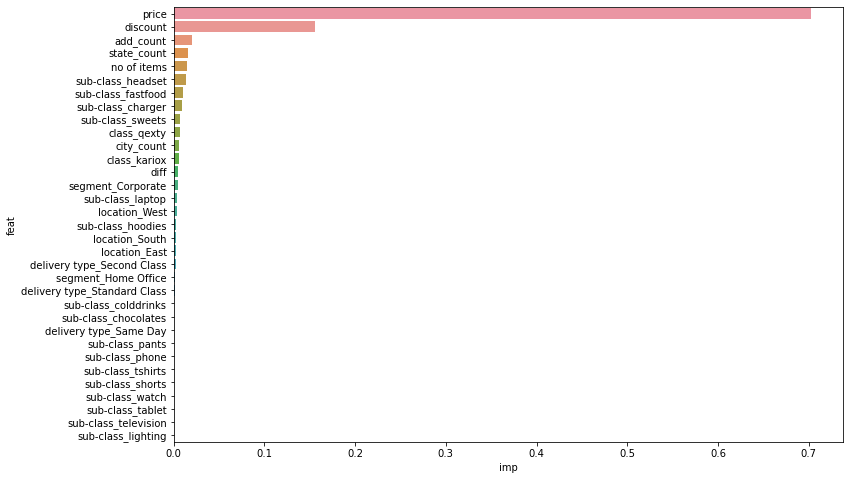

In [82]:
plt.figure(figsize=(12,8))
rf.fit(x,y)
a=zip(x.columns,rf.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
sns.barplot(data=feat_imp, x="imp", y="feat");